In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf

In [2]:
#Fashion MNIST Dataset :https://www.kaggle.com/datasets/zalando-research/fashionmnist
'''
Labels

Each training and test example is assigned to one of the following labels:

0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot
'''

'\nLabels\n\nEach training and test example is assigned to one of the following labels:\n\n0 T-shirt/top\n1 Trouser\n2 Pullover\n3 Dress\n4 Coat\n5 Sandal\n6 Shirt\n7 Sneaker\n8 Bag\n9 Ankle boot\n'

In [3]:
#Load Dataset
(x_train,y_train),(x_test,y_test) =tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
x_train.shape , y_train.shape #Training Dataset Shape

((60000, 28, 28), (60000,))

In [5]:
#Test Dataset Shape
x_test.shape  ,  y_test.shape

((10000, 28, 28), (10000,))

In [6]:
#Label_Encoding
label_encoder={0: 'T-shirt/top'
,1: 'Trouser',
2: 'Pullover',
3: 'Dress',
4: 'Coat',
5: 'Sandal',
6: 'Shirt',
7: 'Sneaker',
8: 'Bag',
9: 'Ankle boot'}

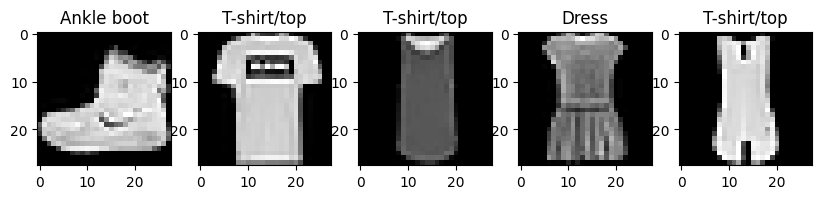

In [7]:
#Plotting Image
plt.figure(figsize=(10,8))
for i in range(5):
  plt.subplot(1,5,i+1)
  plt.imshow(x_train[i],cmap='gray')
  plt.title(label_encoder[y_train[i]])


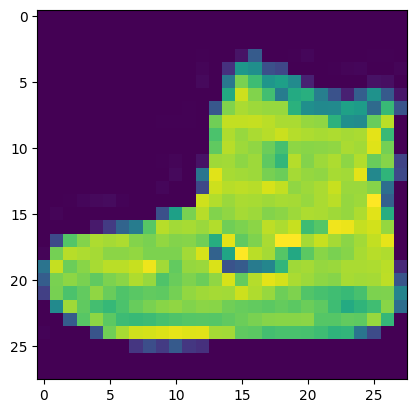

In [8]:
plt.imshow(x_train[0])

In [9]:
#Plot 6 images of each category and each images should be random everytime
def plot_category_images(num=6):
  for i in range(10):
    labels = np.where(y_train== i)[0]  #collecting all indices of a category
    labels = np.random.choice(labels,num)   #selecting 6(num) random indices
    plt.figure(figsize=(10,15))  #Figure Size
    for j in range(num):        #To plot all the 6(num) random images of a particular category
      plt.subplot(i+1,num,j+1)    #Creating Subplot
      plt.title(f"{num} random images:")   #Print : 6(num) random images
      plt.imshow(x_train[labels[j]],cmap='gray')      #Plotting Image of that category with the given random index



ValueError: ignored

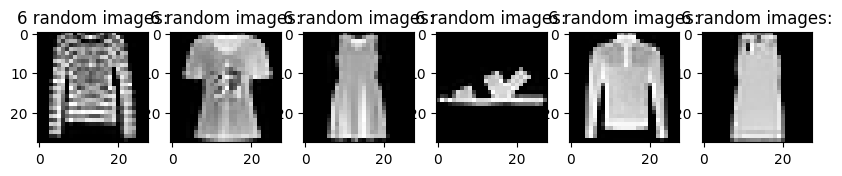

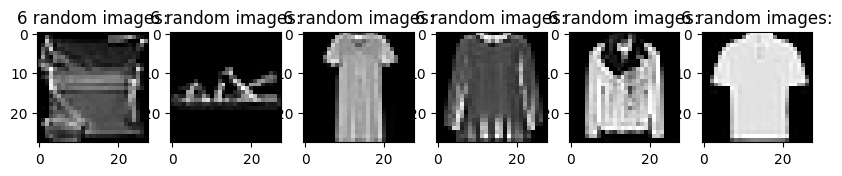

In [11]:
plot_category_images(6)

In [10]:
#Pre-Processing
#Input
x_train=x_train/255.0
#output
y_train=pd.get_dummies(y_train)

In [12]:
x_train.shape , y_train.shape

((60000, 28, 28), (60000, 10))

In [44]:
#Model Creation
model = tf.keras.models.Sequential()
#Input
model.add(tf.keras.layers.Input((28,28),name='Input_Layer'))
#Flatten
model.add(tf.keras.layers.Flatten(name='Flatten_Layer'))
#HiddenLayers
model.add(tf.keras.layers.Dense(units=256,activation=tf.keras.activations.relu,name='Hidden_Layer1'))
#HiddenLayer2
model.add(tf.keras.layers.Dense(units=64,activation=tf.keras.activations.relu,name='Hidden_Layer2'))   #units=16 so as to have a shallow model
#Output
model.add(tf.keras.layers.Dense(units=10,activation=tf.keras.activations.softmax,name='Output_Layer'))

#Model Summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Flatten_Layer (Flatten)     (None, 784)               0         
                                                                 
 Hidden_Layer1 (Dense)       (None, 256)               200960    
                                                                 
 Hidden_Layer2 (Dense)       (None, 64)                16448     
                                                                 
 Output_Layer (Dense)        (None, 10)                650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [14]:
#params calculation
print('H1:',784*128+128)
print('H2:',128*16+16)
print('OP:',16*10+10)
print('Total Parameters : ',784*128+128 + 128*16+16 + 16*10+10)

H1: 100480
H2: 2064
OP: 170
Total Parameters :  102714


In [45]:
#Compiling Model:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.05),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['acc'])

In [46]:
#Fiting Model
model.fit(x_train,y_train,epochs=50,batch_size=64,validation_split=0.1)

Epoch 1/50
844/844 [==============================] - 5s 5ms/step - loss: 0.6262 - acc: 0.7842 - val_loss: 0.4538 - val_acc: 0.8372
Epoch 2/50
844/844 [==============================] - 4s 5ms/step - loss: 0.4404 - acc: 0.8419 - val_loss: 0.4525 - val_acc: 0.8313
Epoch 3/50
844/844 [==============================] - 5s 6ms/step - loss: 0.3943 - acc: 0.8595 - val_loss: 0.4032 - val_acc: 0.8547
Epoch 4/50
844/844 [==============================] - 4s 5ms/step - loss: 0.3650 - acc: 0.8689 - val_loss: 0.3774 - val_acc: 0.8605
Epoch 5/50
844/844 [==============================] - 4s 5ms/step - loss: 0.3450 - acc: 0.8759 - val_loss: 0.3953 - val_acc: 0.8563
Epoch 6/50
844/844 [==============================] - 5s 6ms/step - loss: 0.3301 - acc: 0.8797 - val_loss: 0.3828 - val_acc: 0.8603
Epoch 7/50
844/844 [==============================] - 4s 5ms/step - loss: 0.3150 - acc: 0.8850 - val_loss: 0.3357 - val_acc: 0.8795
Epoch 8/50
844/844 [==============================] - 4s 5ms/step - loss: 0.

In [43]:
del model

In [ ]:
#Saving Model
model.save("Fashion_MNIST_Model")

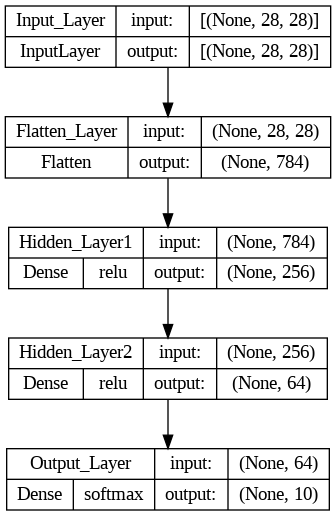

In [33]:
#Plots Model
tf.keras.utils.plot_model(model,show_shapes=True,show_layer_activations=True) #show layers wont work here read documentation

In [ ]:
#Getting Weights
model.get_weights()

In [26]:
model.to_json()
#json viewer :https://codebeautify.org/jsonviewer

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 28, 28], "dtype": "float32", "sparse": false, "ragged": false, "name": "Input_Layer"}}, {"class_name": "Flatten", "config": {"name": "Flatten_Layer", "trainable": true, "dtype": "float32", "data_format": "channels_last"}}, {"class_name": "Dense", "config": {"name": "Hidden_Layer1", "trainable": true, "dtype": "float32", "units": 128, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "Hidden_Layer2", "trainable": true, "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform"

In [ ]:
model.input_shape

(None, 28, 28)

In [ ]:
#model.predict()

Text(0.5, 1.0, 'Ankle boot')

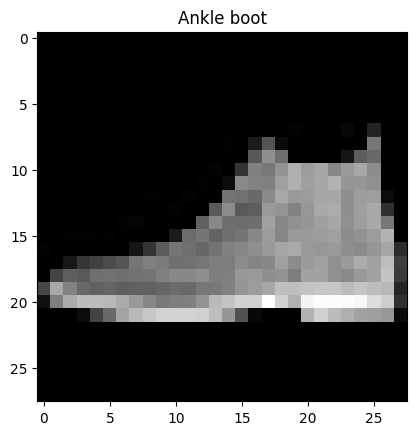

In [68]:
test_image = x_test[0]
plt.imshow(test_image, cmap="gray")
plt.title(label_encoder[y_test[0]])

In [88]:
# Read image
test_image = x_test[0]
# Normalize the image
test_image = test_image/255.0
# Need to introduce a new dimention
print(f"Before np.expand, {test_image.shape}")
test_image = np.expand_dims(test_image, axis=0)
print(f"After np.expand, {test_image.shape}")

Before np.expand, (28, 28)
After np.expand, (1, 28, 28)


In [89]:
result = model.predict(test_image)
result

1/1 [==============================] - 0s 77ms/step


array([[2.9298306e-05, 9.2556796e-08, 6.1960336e-06, 4.1107178e-06,
        9.3253607e-07, 8.4623545e-02, 1.5222202e-05, 1.2722455e-01,
        2.1108424e-03, 7.8598523e-01]], dtype=float32)

In [90]:
print(f"Prob: {np.max(result)}")
print(f"Index: {np.argmax(result)}")

Prob: 0.7859852313995361
Index: 9


In [31]:
label_encoder[9]

'Ankle boot'

In [72]:
def predict(image):
  plt.imshow(image, cmap="gray")
  image = image/255.0
  image = np.expand_dims(image, axis=0)
  result = model.predict(image)
  prob = np.max(result)
  result = np.argmax(result)
  plt.title(label_encoder[result])
  return label_encoder[result], prob

1/1 [==============================] - 0s 25ms/step


('T-shirt/top', 0.79294926)

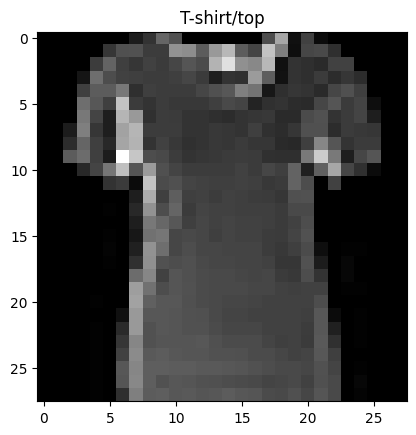

In [73]:
predict(x_test[4000])

In [34]:
test_5_images = x_test[0:5]

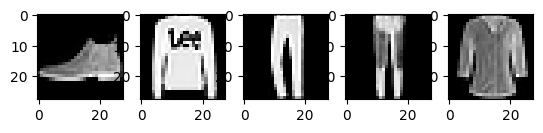

In [35]:
for i in range(5):
  plt.subplot(1,5,i+1)
  plt.imshow(test_5_images[i],cmap='gray')

In [36]:
test_5_images = x_test[0:5]
test_5_images = test_5_images/255.0
print(test_5_images.shape)

(5, 28, 28)


In [37]:
result = model.predict(test_5_images)
result

1/1 [==============================] - 0s 34ms/step


array([[3.50267169e-06, 2.04929802e-06, 3.92877791e-06, 1.31945671e-06,
        8.14411942e-06, 6.28207177e-02, 3.91949698e-06, 2.05638990e-01,
        2.99205119e-03, 7.28525341e-01],
       [7.22009223e-04, 1.01565138e-05, 8.76553476e-01, 9.47221779e-05,
        8.51729698e-03, 4.78990714e-08, 1.13962345e-01, 2.31942476e-13,
        1.40068296e-04, 1.15909561e-12],
       [9.88787724e-06, 9.99978423e-01, 4.23966367e-06, 4.99864700e-06,
        2.32798106e-06, 1.76252530e-14, 4.95203807e-08, 2.99989331e-08,
        9.45851113e-08, 2.89266500e-09],
       [1.43083471e-05, 9.99865890e-01, 4.66423298e-05, 6.08315568e-05,
        1.08196409e-05, 1.65634815e-11, 2.71817214e-07, 7.81003962e-07,
        2.50652249e-07, 2.23844822e-07],
       [1.21549539e-01, 9.69271874e-04, 5.56358770e-02, 9.12541803e-03,
        9.76097863e-03, 1.19425658e-05, 7.98526525e-01, 1.80292957e-07,
        4.42015799e-03, 1.92644819e-07]], dtype=float32)

In [38]:
np.argmax(result,axis=1)

array([9, 2, 1, 1, 6])

In [39]:
y_test[0:5]

array([9, 2, 1, 1, 6], dtype=uint8)

In [47]:
x_test_norm = x_test/255.0

In [48]:
y_pred =np.argmax(model.predict(x_test_norm),axis=1)

313/313 [==============================] - 1s 2ms/step


In [42]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [49]:
(y_test==y_pred).sum()

8898

In [44]:
#Which Images failed
np.where(y_pred!= y_test) #Gives Indices

(array([  12,   17,   20, ..., 9979, 9985, 9989]),)

Actual Label :Shirt
Predicted Label :T-shirt/top


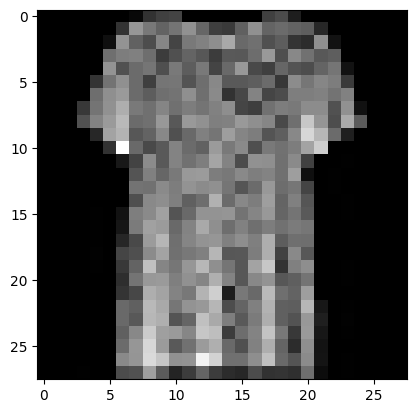

In [45]:
index= 9979
print(f"Actual Label :{label_encoder[y_test[index]]}")
print(f"Predicted Label :{label_encoder[y_pred[index]]}")
plt.imshow(x_test[index],cmap='gray')

In [50]:
import sklearn
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [47]:
type(label_encoder)

dict

In [51]:
cm=confusion_matrix(y_test,y_pred)
pd.DataFrame(cm)

,0,1,2,3,4,5,6,7,8,9
0,876,3,13,19,3,1,78,0,7,0
1,2,983,1,9,3,0,2,0,0,0
2,28,4,861,12,51,2,38,0,4,0
3,21,13,11,892,35,1,21,0,5,1
4,4,3,123,25,788,0,54,0,3,0
5,1,0,0,1,0,936,0,35,2,25
6,141,0,102,23,53,1,663,0,17,0
7,0,0,0,0,0,8,0,974,0,18
8,12,0,7,2,1,1,3,5,968,1
9,0,0,0,0,0,6,1,36,0,957


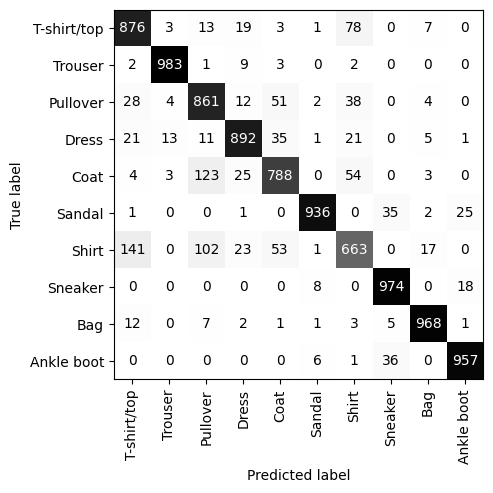

In [52]:
ConfusionMatrixDisplay,
disp=ConfusionMatrixDisplay(cm,display_labels = list(label_encoder.values()))
disp.plot(xticks_rotation='vertical',cmap='Greys',colorbar=False)

<Axes: >

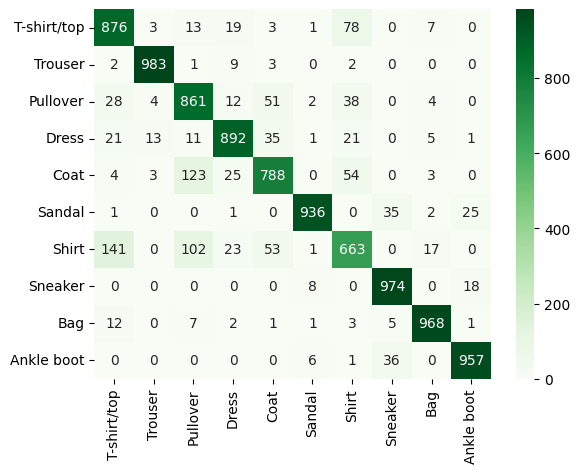

In [53]:
import seaborn as sns
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
sns.heatmap(np.round(confusion_matrix(y_test,y_pred),0),annot=True,cmap='Greens',fmt='.0f',
            xticklabels=list(label_encoder.values()),
            yticklabels=list(label_encoder.values()))

In [54]:
from sklearn.metrics import classification_report

In [55]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [56]:
print(classification_report(y_test, y_pred,zero_division =1,target_names=list(label_encoder.values())))
#labels=list(label_encoder.values())

              precision    recall  f1-score   support

 T-shirt/top       0.81      0.88      0.84      1000
     Trouser       0.98      0.98      0.98      1000
    Pullover       0.77      0.86      0.81      1000
       Dress       0.91      0.89      0.90      1000
        Coat       0.84      0.79      0.81      1000
      Sandal       0.98      0.94      0.96      1000
       Shirt       0.77      0.66      0.71      1000
     Sneaker       0.93      0.97      0.95      1000
         Bag       0.96      0.97      0.97      1000
  Ankle boot       0.96      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

